In [28]:
!pip3 install seaborn
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 5.0 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [29]:
ces_bay = pd.read_csv('ces_bay_cleaned.csv')
ces_bay.head()

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,Ozone,PM2.5,Diesel PM,...,Low Birth Weight,Cardiovascular Disease,Education,Linguistic Isolation,Poverty,Unemployment,Housing Burden,Children < 10 years (%),Pop 10-64 years (%),Elderly > 64 years (%)
0,6095250701,3529,Solano,94590,Vallejo,-122.244902,38.090042,0.036,9.095673,0.411,...,6.42,21.22,24.7,17.6,34.6,12.7,25.2,12.52,75.18,12.30
1,6001407300,2420,Alameda,94601,Oakland,-122.210924,37.762179,0.029,9.082865,0.633,...,7.35,12.41,37.9,12.9,50.1,11.0,35.5,6.28,87.48,6.24
2,6001409000,4687,Alameda,94621,Oakland,-122.221368,37.720011,0.031,8.709957,0.562,...,8.29,15.26,31.0,13.7,44.7,7.3,23.0,18.33,72.97,8.70
3,6001408800,7149,Alameda,94621,Oakland,-122.196942,37.758804,0.031,8.834295,0.321,...,8.95,21.04,43.0,6.2,65.1,8.7,23.3,20.74,70.26,8.99
4,6013365002,5590,Contra Costa,94801,North Richmond,-122.384395,37.959466,0.032,9.145973,0.198,...,6.85,16.39,43.5,27.3,44.7,4.8,25.5,17.87,75.17,6.96


In [30]:
# Identifying columns related to environmental indicators, health outcomes
ces_bay.columns

Index(['Census Tract', 'Total Population', 'California County', 'ZIP',
       'Approximate Location', 'Longitude', 'Latitude', 'Ozone', 'PM2.5',
       'Diesel PM', 'Drinking Water', 'Lead', 'Pesticides', 'Tox. Release',
       'Traffic', 'Cleanup Sites', 'Groundwater Threats', 'Haz. Waste',
       'Imp. Water Bodies', 'Solid Waste', 'Pollution Burden', 'Asthma',
       'Low Birth Weight', 'Cardiovascular Disease', 'Education',
       'Linguistic Isolation', 'Poverty', 'Unemployment', 'Housing Burden',
       'Children < 10 years (%)', 'Pop 10-64 years (%)',
       'Elderly > 64 years (%)'],
      dtype='object')

In [31]:
# Selecting different types of data
socio_economic_indicators = ['Education','Linguistic Isolation', 'Poverty', 'Unemployment']
health_outcomes = ['Asthma', 'Low Birth Weight', 'Cardiovascular Disease']
environmental_indicators = ['Ozone', 'PM2.5', 'Diesel PM', 'Drinking Water', 'Pesticides', 'Tox. Release', 'Traffic', 'Cleanup Sites', 'Groundwater Threats', 'Haz. Waste', 'Imp. Water Bodies', 'Solid Waste']

environmental_indicators = [col for col in environmental_indicators if col in ces_bay.columns]
health_outcomes = [col for col in health_outcomes if col in ces_bay.columns]
socio_economic_indicators = [col for col in socio_economic_indicators if col in ces_bay.columns]

In [32]:
(environmental_indicators, health_outcomes, socio_economic_indicators)


(['Ozone',
  'PM2.5',
  'Diesel PM',
  'Drinking Water',
  'Pesticides',
  'Tox. Release',
  'Traffic',
  'Cleanup Sites',
  'Groundwater Threats',
  'Haz. Waste',
  'Imp. Water Bodies',
  'Solid Waste'],
 ['Asthma', 'Low Birth Weight', 'Cardiovascular Disease'],
 ['Education', 'Linguistic Isolation', 'Poverty', 'Unemployment'])

#### Multiple linear regression
Multiple linear regression is a statistical technique used to understand the relationship between one dependent variable and two or more independent variables. In the context of this dataset, we are using it to investigate how different environmental indicators are related to health outcomes like Asthma, Low Birth Weight, and Cardiovascular Disease.

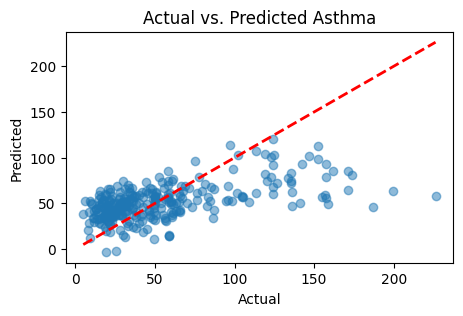

Asthma R-squared: 0.3077404215564423 MSE: 1203.2057192680181


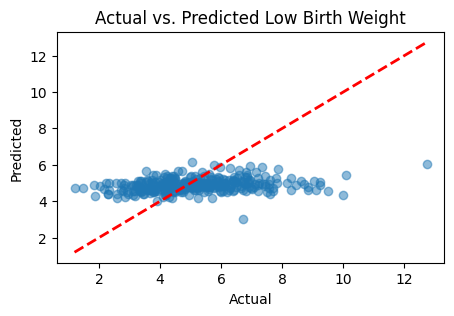

Low Birth Weight R-squared: 0.03463946903653803 MSE: 2.795741322824993


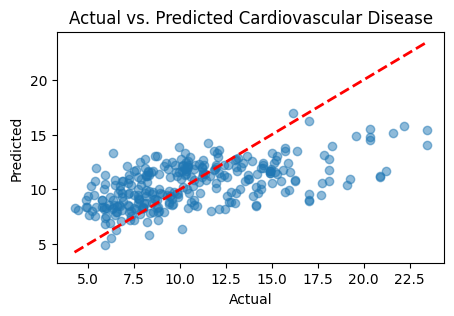

Cardiovascular Disease R-squared: 0.3256739582795851 MSE: 10.505486791484385


In [42]:
def regression_and_plot(features, target, outcome_name):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

    # Initialize and fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Plotting the results
    plt.figure(figsize=(5, 3))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs. Predicted {outcome_name}')
    filename = f'{outcome_name}_regression_plot.png'
    plt.savefig(filename)
    plt.show()

    # Calculate R-squared and Mean Squared Error
    r_squared = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # Return the model and metrics
    print(outcome_name,"R-squared:",r_squared,"MSE:", mse)

    return model, r_squared, mse

# Performing regression and plotting for Asthma
asthma_features = ces_bay[environmental_indicators]
asthma_target = ces_bay['Asthma']
asthma_model, asthma_r2, asthma_mse = regression_and_plot(asthma_features, asthma_target, 'Asthma')

# Performing regression and plotting for Low Birth Weight
lbw_features = ces_bay[environmental_indicators]
lbw_target = ces_bay['Low Birth Weight']
lbw_model, lbw_r2, lbw_mse = regression_and_plot(lbw_features, lbw_target, 'Low Birth Weight')

# Performing regression and plotting for Cardiovascular Disease
cvd_features = ces_bay[environmental_indicators]
cvd_target = ces_bay['Cardiovascular Disease']
cvd_model, cvd_r2, cvd_mse = regression_and_plot(cvd_features, cvd_target, 'Cardiovascular Disease')

#### Interpretation of the results:

##### Asthma Model:
With an R-squared of 0.3077, the model suggests that approximately 30.77% of the variability in asthma rates can be explained by the environmental indicators used in the model. However, an MSE of 1203.21 indicates that the model's predictions are, on average, 1203.21 units squared away from the actual asthma rates, which suggests that there could be other factors affecting asthma rates that are not captured by this model.

##### Low Birth Weight Model:
The low R-squared of 0.0346 indicates a weak fit; the model explains only 3.46% of the variability in low birth weight rates. This low percentage suggests that other variables not included in the model or non-linear relationships might be more influential in predicting low birth weight.

#### Cardiovascular Disease Model:
An R-squared of 0.3257 indicates a moderate fit, where about 32.57% of the variability in cardiovascular disease rates can be explained by the environmental indicators. The MSE of 10.51 is the average squared prediction error, which, while not perfect, indicates that the model has some predictive power.

For each health outcome, the specific coefficients tell us how much each environmental indicator contributes to the health outcome. A positive coefficient for an environmental indicator means that higher values of that indicator are associated with higher values of the health outcome. Conversely, a negative coefficient suggests that higher values of the environmental indicator are associated with lower values of the health outcome.





#### Correlation Matrix

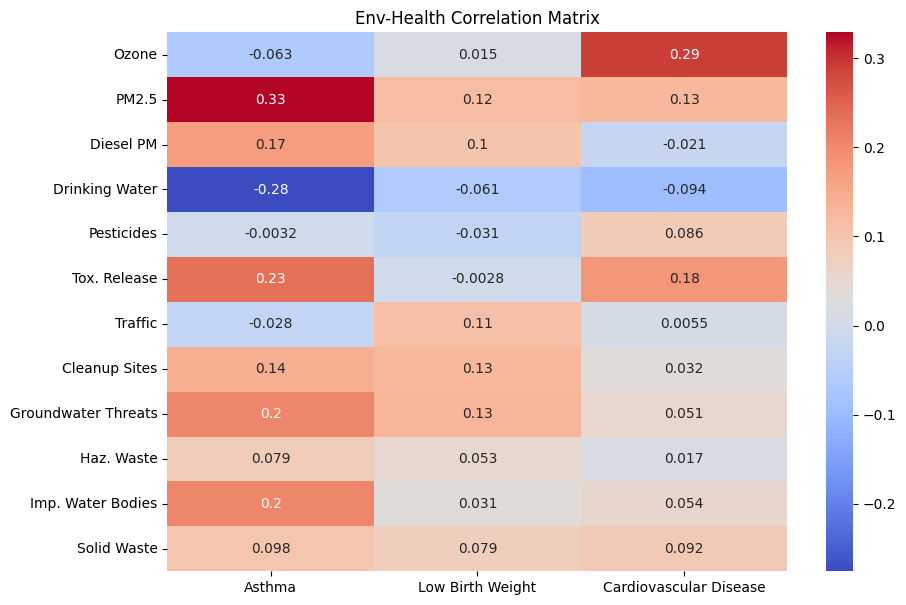

In [43]:
env_health = environmental_indicators + health_outcomes
cor_env_health = ces_bay[env_health].corr()

# Correlation between env indicators and health outcomes
health_env_correlation = cor_env_health.loc[environmental_indicators, health_outcomes]

plt.figure(figsize=(10,7))
sns.heatmap(health_env_correlation, annot= True, cmap = 'coolwarm')
plt.title('Env-Health Correlation Matrix')
plt.savefig('E-H.png')
plt.show()

In [35]:
# Setting thresholds to categeorize the values
weak_correlation_threshold = 0.14
moderate_correlation_threshold = 0.15
strong_correlation_threshold = 0.25

moderate_to_strong_correlation = health_env_correlation.applymap(
    lambda x: 'Moderate' if moderate_correlation_threshold <= x <= strong_correlation_threshold 
    else ('Strong' if x > strong_correlation_threshold else 'Weak'))

moderate_to_strong_correlation

/var/folders/4c/7l6lkj296v79769881mxsy8h0000gn/T/ipykernel_13237/2954676290.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  moderate_to_strong_correlation = health_env_correlation.applymap(


,Asthma,Low Birth Weight,Cardiovascular Disease
Ozone,Weak,Weak,Strong
PM2.5,Strong,Weak,Weak
Diesel PM,Moderate,Weak,Weak
Drinking Water,Weak,Weak,Weak
Pesticides,Weak,Weak,Weak
Tox. Release,Moderate,Weak,Moderate
Traffic,Weak,Weak,Weak
Cleanup Sites,Weak,Weak,Weak
Groundwater Threats,Moderate,Weak,Weak
Haz. Waste,Weak,Weak,Weak


The categorized results from the correlation analysis tell us the strength of the linear relationship between each environmental variable and the health outcomes of interest.

##### Asthma:
PM2.5 and Drinking Water have a strong correlation with asthma rates. This suggests that areas with higher particulate matter (PM2.5) or poor drinking water quality might see higher rates of asthma.
Diesel PM, Tox. Release, Groundwater Threats, and Imp. Water Bodies have a moderate correlation with asthma. This implies that these environmental factors could have a noticeable but less intense impact on asthma rates compared to PM2.5 and drinking water quality.
Ozone and other variables have a weak correlation with asthma, indicating a less clear or more negligible relationship.

##### Low Birth Weight:
All environmental variables have been categorized as having a weak correlation with low birth weight rates. This means that there isn't a strong linear relationship between these specific environmental factors and low birth weight according to the data provided. Other factors not included in the analysis might be more influential.

##### Cardiovascular Disease:
Ozone has a strong correlation with cardiovascular disease rates, suggesting a significant relationship where areas with higher levels of ozone might have higher rates of cardiovascular disease.
Toxic Release shows a moderate correlation, indicating a potential moderate impact on cardiovascular disease rates.
The rest of the environmental variables have a weak correlation with cardiovascular disease, indicating less influence based on the linear correlation coefficient alone.


Furthermore, the impact of an environmental variable on health can be complex and influenced by many other factors, such as genetics, lifestyle, access to healthcare, and socioeconomic status, but the results above point to direct correlation between severe health coditions and environmental variables

In [44]:
moderate_to_strong_correlation.to_csv('cor.csv')

In [36]:
import pandas as pd

# Load the dataset
data = pd.read_csv('ces_bay_cleaned.csv')  # Replace with your file path

# Selecting data for Alameda County
alameda_data = data[data['California County'] == 'Alameda']

# Columns of interest
disease_columns = ['Asthma', 'Low Birth Weight', 'Cardiovascular Disease']
environmental_columns = ['Ozone', 'PM2.5', 'Diesel PM', 'Drinking Water', 'Pesticides', 'Tox. Release', 
                         'Traffic', 'Cleanup Sites', 'Groundwater Threats', 'Haz. Waste', 'Imp. Water Bodies', 'Solid Waste']

# Handling missing values by filling them with the mean (or another appropriate statistic)
alameda_data = alameda_data.fillna(alameda_data.mean())

# Calculating the correlation matrix
correlation_matrix = alameda_data[disease_columns + environmental_columns].corr()

# Extracting the correlation values between diseases and environmental factors
correlation_results = correlation_matrix.loc[disease_columns, environmental_columns]
print(correlation_results)
for col in alameda_data.columns:
    unique_values = alameda_data[col].nunique()
    print(f"{col}: Unique Values - {unique_values}, Data Type - {alameda_data[col].dtype}")

                        Ozone  PM2.5  Diesel PM  Drinking Water  Pesticides  \
Asthma                    NaN    NaN        NaN             NaN         NaN   
Low Birth Weight          NaN    NaN        NaN             NaN         NaN   
Cardiovascular Disease    NaN    NaN        NaN             NaN         NaN   

                        Tox. Release  Traffic  Cleanup Sites  \
Asthma                           NaN      NaN            NaN   
Low Birth Weight                 NaN      NaN            NaN   
Cardiovascular Disease           NaN      NaN            NaN   

                        Groundwater Threats  Haz. Waste  Imp. Water Bodies  \
Asthma                                  NaN         NaN                NaN   
Low Birth Weight                        NaN         NaN                NaN   
Cardiovascular Disease                  NaN         NaN                NaN   

                        Solid Waste  
Asthma                          NaN  
Low Birth Weight                NaN  

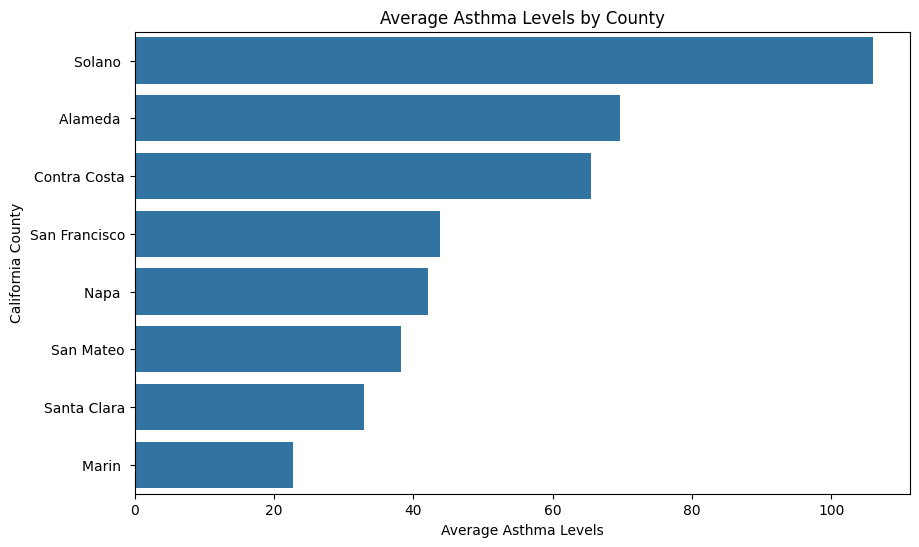

In [37]:
if 'California County' in ces_bay.columns and 'Asthma' in ces_bay.columns:
    # Grouping the data by county and calculating the average PM2.5 levels
    county_asthma = ces_bay.groupby('California County')['Asthma'].mean().sort_values(ascending=False)

    # Plotting the data
    plt.figure(figsize=(10, 6))
    sns.barplot(x=county_asthma.values, y=county_asthma.index)
    plt.xlabel('Average Asthma Levels')
    plt.ylabel('California County')
    plt.title('Average Asthma Levels by County')
    plt.show()

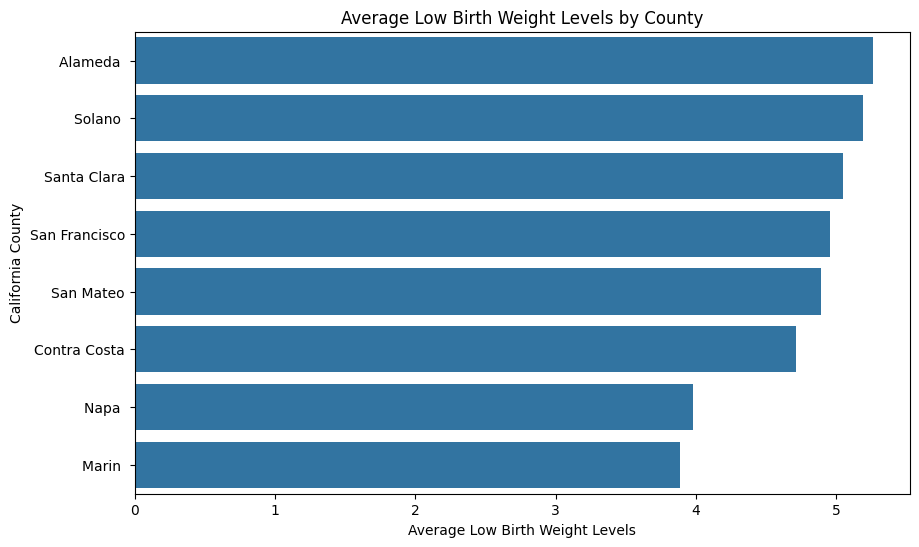

In [38]:
if 'California County' in ces_bay.columns and 'Low Birth Weight' in ces_bay.columns:
    # Grouping the data by county and calculating the average PM2.5 levels
    county_Low_Birth_Weight = ces_bay.groupby('California County')['Low Birth Weight'].mean().sort_values(ascending=False)

    # Plotting the data
    plt.figure(figsize=(10, 6))
    sns.barplot(x=county_Low_Birth_Weight.values, y=county_Low_Birth_Weight.index)
    plt.xlabel('Average Low Birth Weight Levels')
    plt.ylabel('California County')
    plt.title('Average Low Birth Weight Levels by County')
    plt.show()

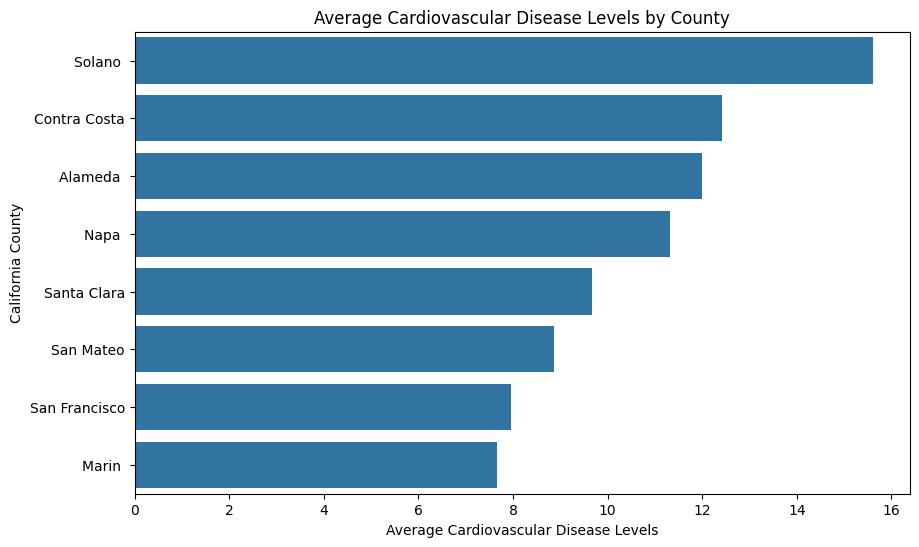

In [39]:
# Check if the required columns exist and then proceed with the analysis
if 'California County' in ces_bay.columns and 'Cardiovascular Disease' in ces_bay.columns:
    # Grouping the data by county and calculating the average Cardiovascular Disease levels
    county_Cardiovascular_Disease = ces_bay.groupby('California County')['Cardiovascular Disease'].mean().sort_values(ascending=False)

    # Plotting the data
    plt.figure(figsize=(10, 6))
    sns.barplot(x=county_Cardiovascular_Disease.values, y=county_Cardiovascular_Disease.index)
    plt.xlabel('Average Cardiovascular Disease Levels')
    plt.ylabel('California County')
    plt.title('Average Cardiovascular Disease Levels by County')
    plt.show()

In [40]:
county_correlation = {}
for county in ces_bay['California County'].unique():
    county_data = ces_bay[ces_bay['California County'] == county]
    correlation_matrix = county_data[environmental_indicators + health_outcomes].corr()
    county_correlation[county] = correlation_matrix.loc[environmental_indicators, health_outcomes]

county_correlation

{'Solano ':                        Asthma  Low Birth Weight  Cardiovascular Disease
 Ozone               -0.418856         -0.471671               -0.174015
 PM2.5                0.441323          0.485320                0.189448
 Diesel PM            0.429834          0.294624                0.301531
 Drinking Water      -0.156568         -0.074585               -0.096412
 Pesticides          -0.242166         -0.259293               -0.186414
 Tox. Release         0.064052          0.222010               -0.095707
 Traffic              0.013926          0.034760               -0.124325
 Cleanup Sites       -0.136392         -0.078400               -0.090294
 Groundwater Threats -0.035476         -0.063951                0.030183
 Haz. Waste          -0.184721         -0.111421               -0.129489
 Imp. Water Bodies   -0.032823          0.003718                0.073688
 Solid Waste          0.028591         -0.106759                0.126736,
 'Alameda ':                        Ast